# Task2

## By: Ahmed Eraki
## Mail: ahmedmohamed9667@gmail.com

####  Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# checking for null values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
for i in df[['Age','Cabin','Embarked']]:
    print(df[i].value_counts())
    print('\n')

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64


B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64


S    644
C    168
Q     77
Name: Embarked, dtype: int64




In [6]:
#so let us fill nan values
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [7]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [8]:
#we can not detect the values we need to fill nan values with as it is a categorical Data so we will remove it
df.drop('Cabin', axis=1, inplace=True)

In [9]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [10]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [11]:
#now check the nan values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
#drop columns we do not need
df.drop(columns=['PassengerId','Name','Ticket'] , axis=1 , inplace=True)

In [13]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


# Visualizing Data

male      577
female    314
Name: Sex, dtype: int64


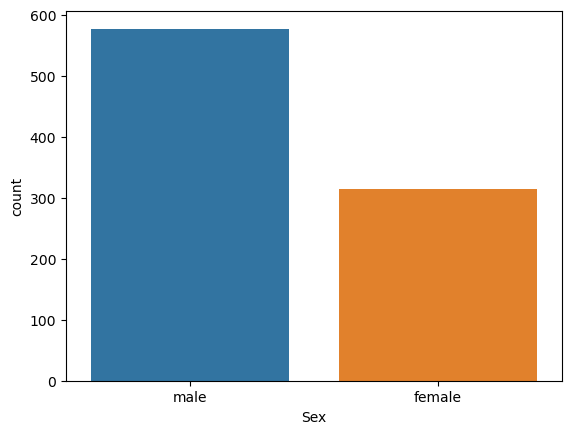

In [14]:
sns.countplot(x=df['Sex'])
print(df['Sex'].value_counts())
plt.show()

we see males were more than females on titanic

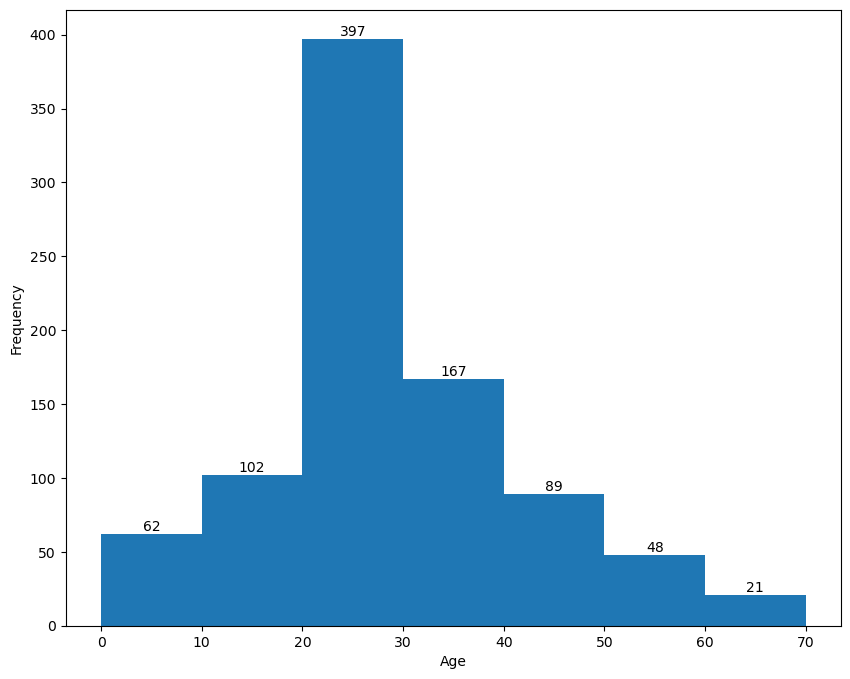

In [15]:
figure , ax = plt.subplots(figsize=(10,8))
hist = plt.hist(df['Age'] ,bins=np.arange(0,80,10))
for hist in ax.containers:
    ax.bar_label(hist)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

we see ages between 20 and 30 were the most existed on titanic while old people between 60 and 70 were the least

there are 62 kids under 10 were on the ship

In [16]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

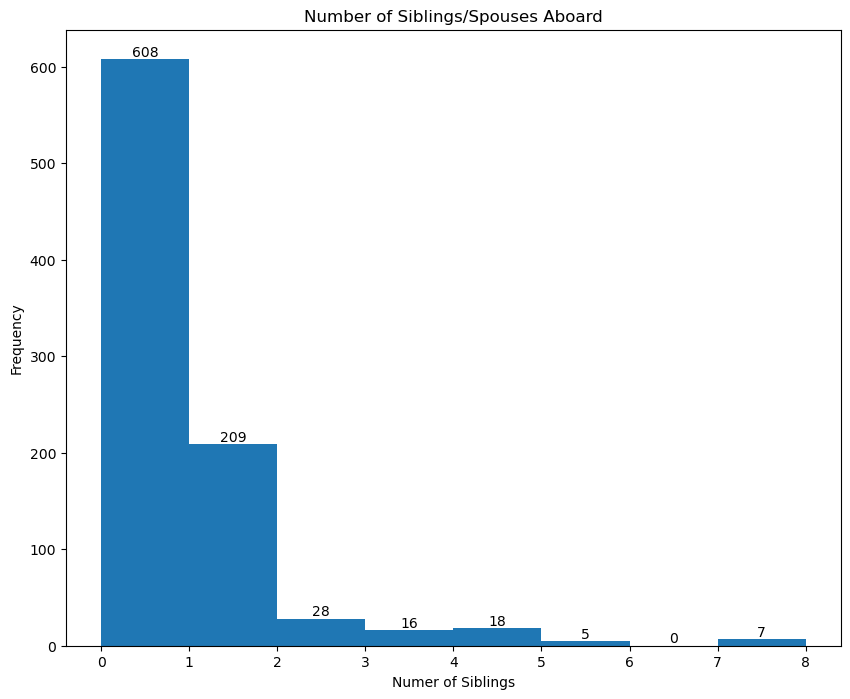

In [17]:
figure , ax = plt.subplots(figsize=(10,8))
hist = plt.hist(df['SibSp'] , bins = np.arange(0,9,1))
for hist in ax.containers :
    ax.bar_label(hist)
plt.xlabel('Numer of Siblings')
plt.ylabel('Frequency')
plt.title('Number of Siblings/Spouses Aboard')
plt.show()

Most of passengers on titanic were not having siblings while 209 passengers were having 1 sibling

passengers who were having 5 siblings are the least while no passengers were having 6 siblings

Survived    0    1
Sex               
female     81  233
male      468  109


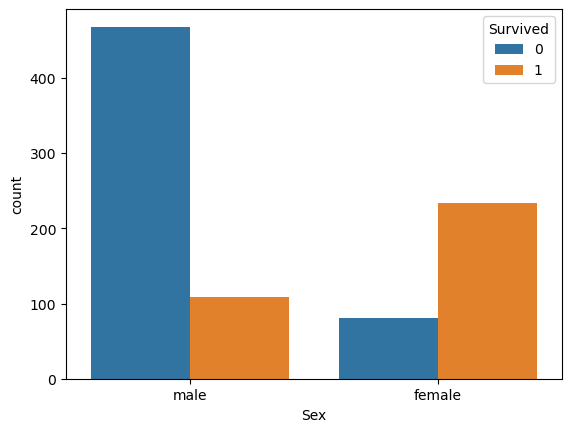

In [18]:
print(pd.crosstab(df['Sex'] ,df['Survived'] ))

sns.countplot(x=df['Sex'] , hue= df['Survived'])
plt.show()

most of casualties were from men on titanic while more feamles survived

486 men died on titanic 81 females died

Pclass    1    2    3
Sex                  
female   94   76  144
male    122  108  347


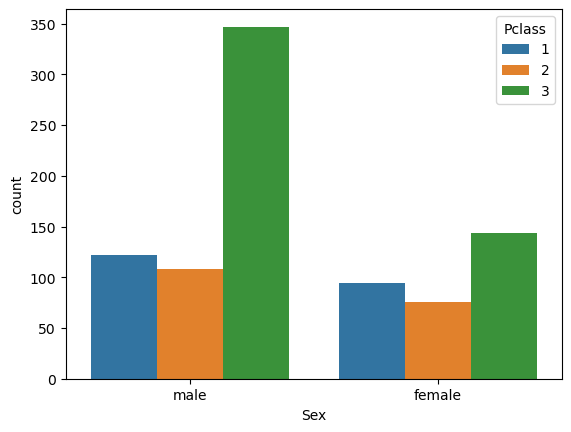

In [19]:
print(pd.crosstab(df['Sex'] , df['Pclass']))

sns.countplot(x=df['Sex'] , hue = df['Pclass'])
plt.show()

most of men and women on titanic were on the third class

men were more than women on first class

Embarked   C   Q    S
Sex                  
female    73  36  205
male      95  41  441


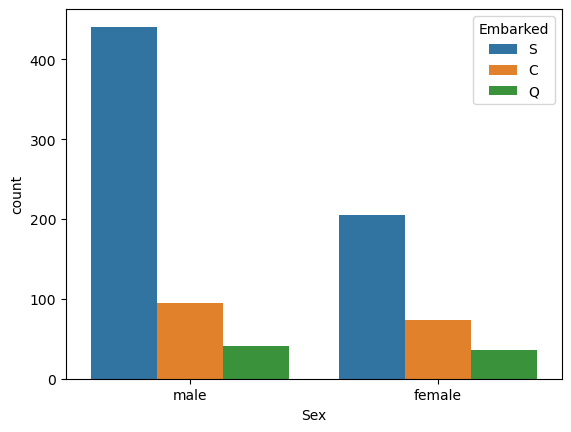

In [20]:
print(pd.crosstab(df['Sex'] , df['Embarked']))
sns.countplot(x = df['Sex'] , hue = df['Embarked'])
plt.show()

most of passengers from both genders embarked from Southhampton

the least numbers of passengers embarked from Queenstown

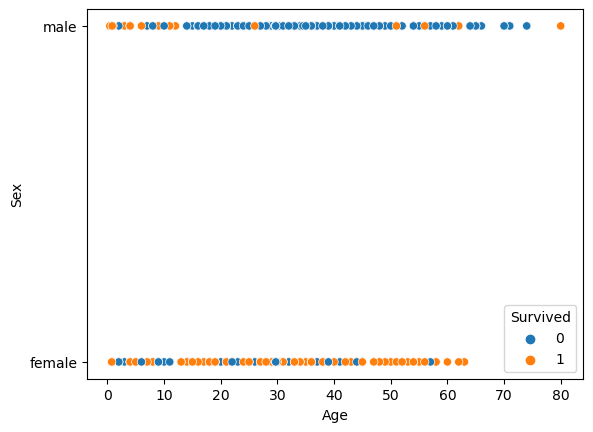

In [21]:
sns.scatterplot(x=df['Age'] , y=df['Sex'] , hue=df['Survived'])
plt.show()

most of men between 10 and 50 did not survive

most of females between 10 and 20 survived and so women between 40 and 60

# Checking the outliers

In [22]:
#detect categotical and numerical data
cat = []
num=[]
for i in df.columns:
    if df[i].dtypes =='object':
        cat.append(i)
    else:
        num.append(i)

In [23]:
print('categorical columns are : ',cat)
print('Numerical columns are : ',num)

categorical columns are :  ['Sex', 'Embarked']
Numerical columns are :  ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [24]:
for i in num:
    print(df[i].value_counts())   
    print('\n')

0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64




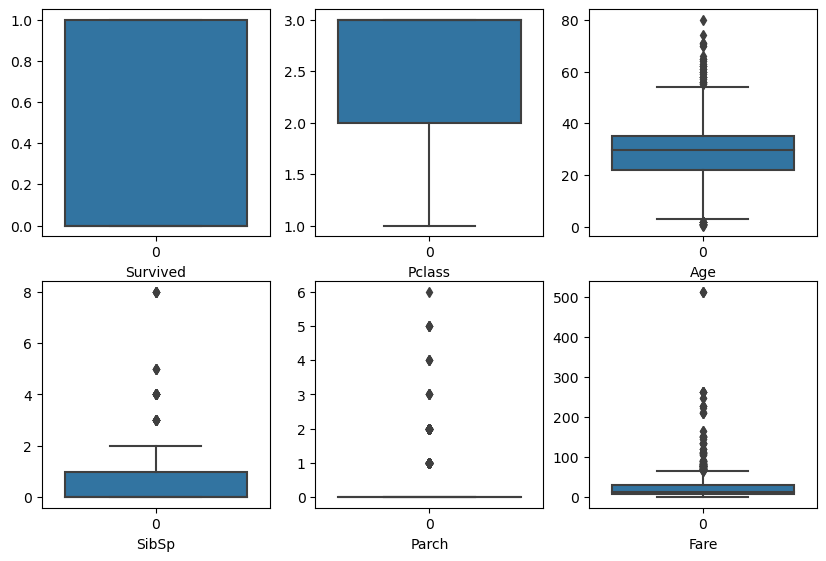

In [25]:
#visulaize boxplot
plt.figure(figsize=(10,10))
plotnumber = 1
for i in num :
    if plotnumber <= 6 :
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()    

SibSp , Parch are discrete data s no need to remove outliers 

we will remove outliers of Age , Fare because they contain continuous Data

In [26]:
#use Zscore method
from scipy.stats import zscore

In [27]:
outliers = df[['Age','Fare']]
z = np.abs(zscore(outliers))

In [28]:
filtering = (z<3).all(axis=1)
df1 = df[filtering]

In [29]:
print('old shape is ',df.shape)
print('new shape is ',df1.shape)
print('percentage of loss is ',((df.shape[0]/df1.shape[0])/df.shape[0])*100)

old shape is  (891, 8)
new shape is  (864, 8)
percentage of loss is  0.11574074074074073


In [30]:
#use IQR method
outliers = ['Age','Fare']
#1st percentile
q1 = df[outliers].quantile(0.25)

#3rd percentile
q3 = df[outliers].quantile(0.75)

IQR = q3-q1
df2 = df[~((df <(q1 - 1.5*IQR)) | (df >(q3 + 1.5*IQR))).any(axis=1)]

In [31]:
print('old shape is ',df.shape)
print('new shape is ',df2.shape)
print('percentage of loss is ',((df.shape[0]/df2.shape[0])/df.shape[0])*100)

old shape is  (891, 8)
new shape is  (721, 8)
percentage of loss is  0.13869625520110956


IQR method is the best method t remove outliers

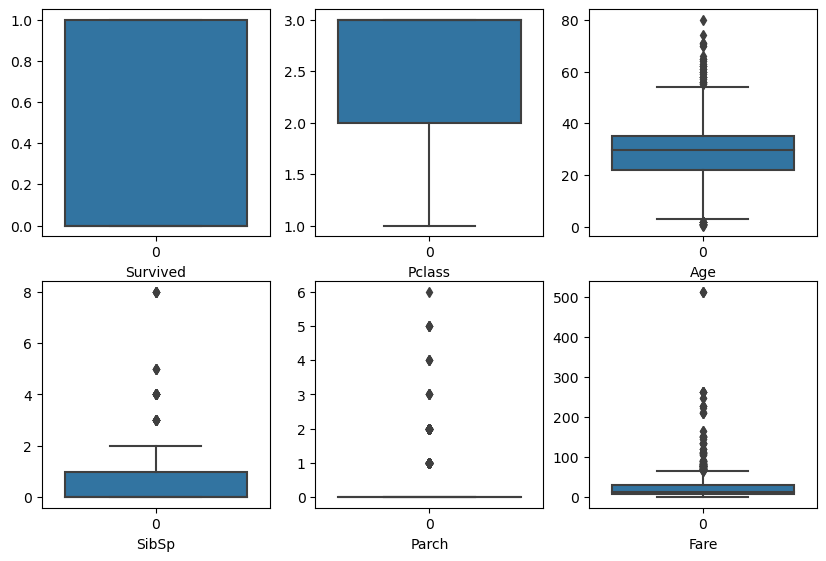

In [32]:
plt.figure(figsize=(10,10))
plotnumber = 1
for i in num :
    if plotnumber <= 6:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i)
    plotnumber +=1
plt.show()    

we removed the ouliers as we could have managed but since they are all in continuous data format we shall ignore it

In [33]:
df2.skew()

Survived    0.690965
Pclass     -1.108345
Age         0.015118
SibSp       2.877469
Parch       3.313740
Fare        1.519028
dtype: float64

Survived,Pclass,SibSp,Parch are dicrete data so no need to reduce skewness

we will reduce skewness of 'Fare' because in contains continuous Data

In [34]:
df2['Fare'] = np.cbrt(df2['Fare'])

In [35]:
df2.skew()

Survived    0.690965
Pclass     -1.108345
Age         0.015118
SibSp       2.877469
Parch       3.313740
Fare       -0.279122
dtype: float64

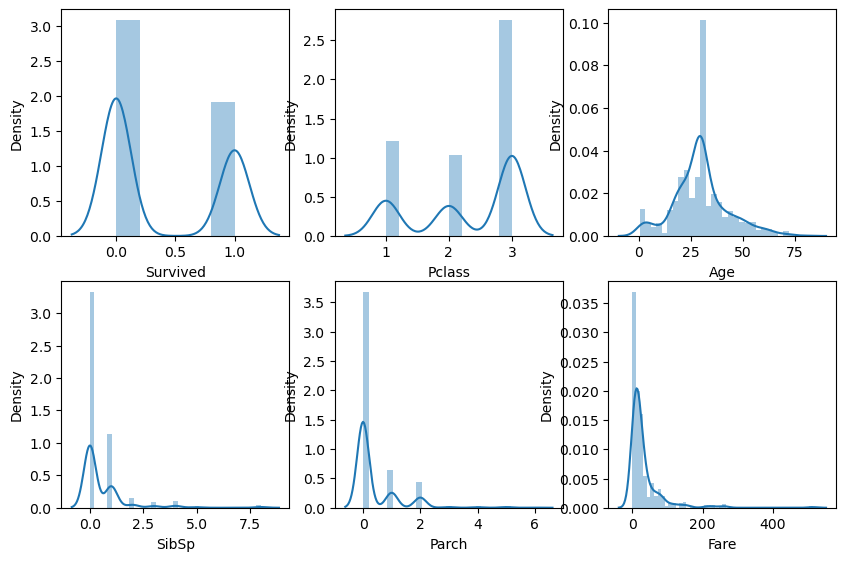

In [36]:
plt.figure(figsize=(10,10))
plotnumber = 1
for i in num :
    if plotnumber <= 6:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i)
    plotnumber +=1
plt.show()    

we see most of Data are normally distributed

# correlation

In [37]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,1.935438,S
2,1,3,female,26.000000,0,0,1.993730,S
3,1,1,female,35.000000,1,0,3.758647,S
4,0,3,male,35.000000,0,0,2.004158,S
5,0,3,male,29.699118,0,0,2.037485,Q
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,2.351335,S
887,1,1,female,19.000000,0,0,3.107233,S
888,0,3,female,29.699118,1,2,2.862294,S
889,1,1,male,26.000000,0,0,3.107233,C


In [38]:
df2['Sex'] = df2['Sex'].replace({'male':1 , 'female':0})
df2['Embarked'] = df2['Embarked'].replace({'S':0 , 'Q':1 , 'C':3})

In [39]:
df2.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,1.935438,0
2,1,3,0,26.0,0,0,1.993730,0
3,1,1,0,35.0,1,0,3.758647,0


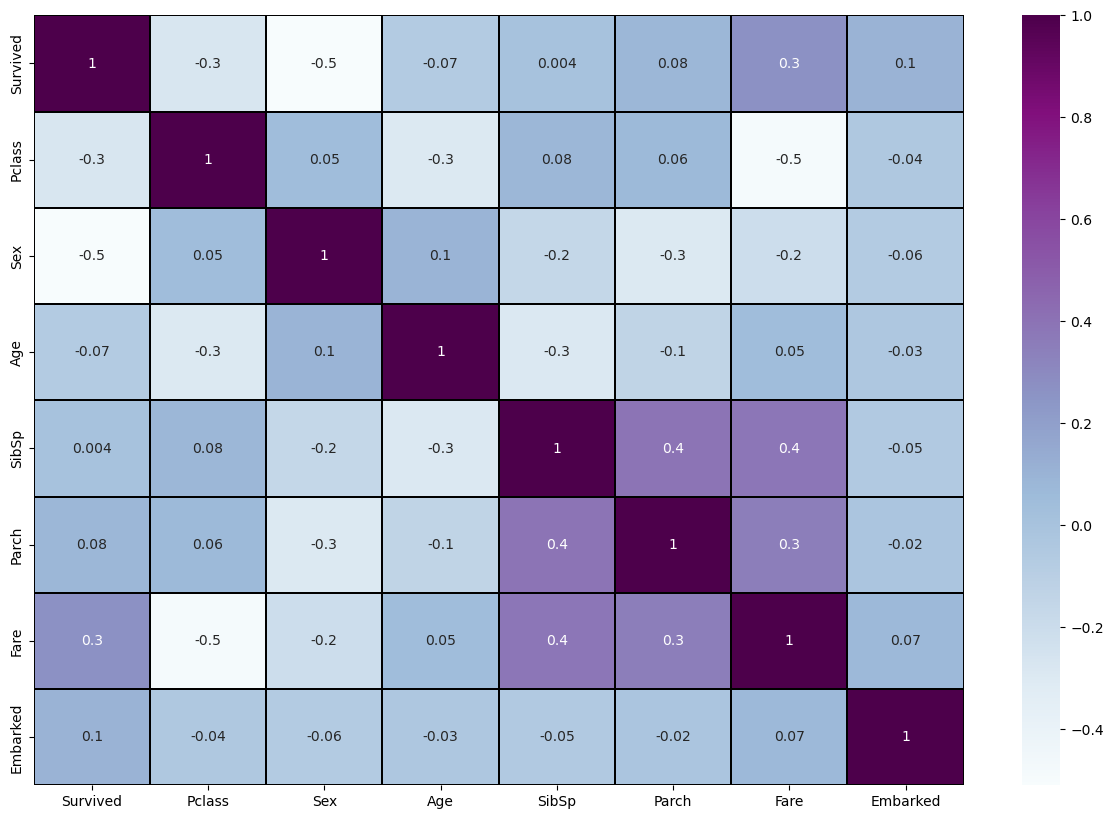

In [40]:
#visualize heatmap between variables
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(), linewidth=0.1 ,annot=True ,cmap='BuPu' , linecolor='black' , fmt='0.1g')
plt.show()

There is strong positive relation between Parch and SibSp and Fare

target label Survived has positive relation with Fare but not too strong and positive relation with pclass


In [41]:
df2.corr()['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.265120
Embarked    0.102206
Parch       0.079950
SibSp       0.004221
Age        -0.065202
Pclass     -0.273088
Sex        -0.510246
Name: Survived, dtype: float64

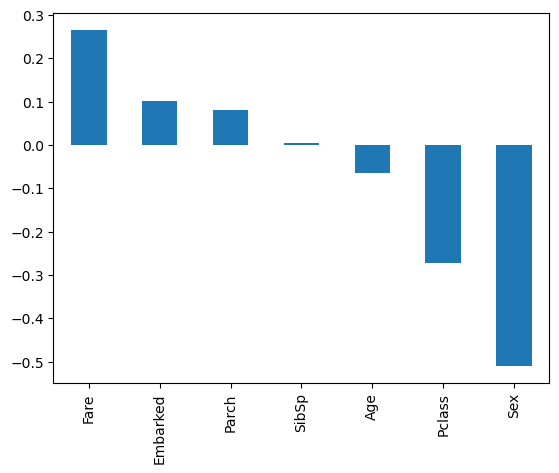

In [42]:
df2.corr()['Survived'].sort_values(ascending=False).drop('Survived').plot(kind='bar')
plt.show()

Survived has the strongest positive correlation with Fare and the strongest negative correlation with Sex

# scaling features

In [43]:
x1 = df2.drop('Survived' , axis=1)
y1 = df2['Survived']

In [44]:
print(y1.unique())
print('features dimension is ',x1.shape)
print('label dimension us ,',y1.shape)

[0 1]
features dimension is  (721, 7)
label dimension us , (721,)


In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [46]:
x_scaled = pd.DataFrame(data = scaler.fit_transform(x1) , columns= x1.columns)
x_scaled

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.685208,0.686607,-0.645253,0.685904,-0.410103,-0.735176,-0.505303
1,0.685208,-1.456438,-0.246708,-0.485984,-0.410103,-0.647557,-0.505303
2,-2.105950,-1.456438,0.650019,0.685904,-0.410103,2.005293,-0.505303
3,0.685208,0.686607,0.650019,-0.485984,-0.410103,-0.631883,-0.505303
4,0.685208,0.686607,0.121859,-0.485984,-0.410103,-0.581790,0.438540
...,...,...,...,...,...,...,...
716,-0.710371,0.686607,-0.147072,-0.485984,-0.410103,-0.110041,-0.505303
717,-2.105950,-1.456438,-0.944162,-0.485984,-0.410103,1.026151,-0.505303
718,0.685208,-1.456438,0.121859,0.685904,2.127961,0.657984,-0.505303
719,-2.105950,0.686607,-0.246708,-0.485984,-0.410103,1.026151,2.326227


# Check Variance inflation Factor

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
vif = pd.DataFrame()
vif['value of VIF'] = [variance_inflation_factor(x_scaled.values , i) for i in range(len(x_scaled.columns))]
vif['column']= x_scaled.columns
vif

,value of VIF,column
0,1.607108,Pclass
1,1.121085,Sex
2,1.201251,Age
3,1.488792,SibSp
4,1.381330,Parch
5,1.912808,Fare
6,1.021411,Embarked


There is NO multicollineraity problem

# Building the model

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.ensemble import AdaBoostRegressor , GradientBoostingClassifier , BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier , RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , roc_curve

In [50]:
lr = LogisticRegression()
accuracy=[]
random=[]
for i in range(0,200):
    x_train , x_test , y_train,y_test = train_test_split(x_scaled,y1, random_state=i , test_size=0.3)
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    accuracy.append(acc)
    random.append(i)
    

In [51]:
rand=pd.DataFrame()
rand['accuracy']=accuracy
rand['stats']= random
rand

,accuracy,stats
0,0.801843,0
1,0.778802,1
2,0.788018,2
3,0.797235,3
4,0.797235,4
...,...,...
195,0.723502,195
196,0.778802,196
197,0.760369,197
198,0.797235,198


In [52]:
rand[rand['accuracy'] == rand['accuracy'].max() ]

,accuracy,stats
132,0.852535,132


the best accuracy is 85.25% when number f stats are 132

In [53]:
x_train , x_test , y_train , y_test = train_test_split(x_scaled,y1 , random_state=132 , test_size=0.3)

In [54]:
rfc = RandomForestClassifier()
svc = SVC()
gbc = GradientBoostingClassifier()
bc = BaggingClassifier()
ac = AdaBoostClassifier()
etc = ExtraTreesClassifier()
dct = DecisionTreeClassifier()
knn = KNeighborsClassifier()

In [55]:
models = {'LogisticRegressin':lr ,'RandomForestClassifier':rfc , 'SVC':svc , 'GradientBoostingClassifier':gbc
          ,'BaggingClassifier': bc , 'AdaBoostClassifier':ac , 'ExtraTreesClassifier':etc ,
          'DecisionTreeClassifier':dct , 'KNeighborsClassifier':knn}
for name , m in models.items():
    m.fit(x_train,y_train)
    y_pred = m.predict(x_test)
    print('mdel name is : ',name)
    print('accuracy score of test data is ','{:.2f}'.format(accuracy_score(y_test,y_pred)*100),'%')
    print('accuracy score of train data is ','{:.2f}'.format(accuracy_score(y_train,m.predict(x_train))*100),'%')
    print('\n')
    print('confusion matrix is ',confusion_matrix(y_test,y_pred))
    print('classification report is \n',classification_report(y_test,y_pred))

mdel name is :  LogisticRegressin
accuracy score of test data is  85.25 %
accuracy score of train data is  78.57 %


confusion matrix is  [[127  17]
 [ 15  58]]
classification report is 
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       144
           1       0.77      0.79      0.78        73

    accuracy                           0.85       217
   macro avg       0.83      0.84      0.84       217
weighted avg       0.85      0.85      0.85       217

mdel name is :  RandomForestClassifier
accuracy score of test data is  80.65 %
accuracy score of train data is  97.42 %


confusion matrix is  [[125  19]
 [ 23  50]]
classification report is 
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       144
           1       0.72      0.68      0.70        73

    accuracy                           0.81       217
   macro avg       0.78      0.78      0.78       217
weighted avg       0

AdaBoostClassifier model has the best accuracy

# Cross Validation Score

In [59]:
models = {'LogisticRegressin':lr ,'RandomForestClassifier':rfc , 'SVC':svc , 'GradientBoostingClassifier':gbc
          ,'BaggingClassifier': bc , 'AdaBoostClassifier':ac , 'ExtraTreesClassifier':etc ,
          'DecisionTreeClassifier':dct , 'KNeighborsClassifier':knn}

for name , m in models.items():
    print('model name is ',name)
    score = cross_val_score(m , x_scaled , y1)
    print('score of ',name,' is ',score)
    print('mean is ',score.mean())
    print('Difference between accuracy score and score mean is: ',accuracy_score(y_test,m.predict(x_test)) - score.mean())
    print('\n')

model name is  LogisticRegressin
score of  LogisticRegressin  is  [0.76551724 0.77083333 0.77083333 0.77083333 0.81944444]
mean is  0.779492337164751
Difference between accuracy score and score mean is:  0.07304222504723057


model name is  RandomForestClassifier
score of  RandomForestClassifier  is  [0.75172414 0.78472222 0.82638889 0.79166667 0.84027778]
mean is  0.798955938697318
Difference between accuracy score and score mean is:  0.0074956742059077985


model name is  SVC
score of  SVC  is  [0.7862069  0.77777778 0.8125     0.82638889 0.84027778]
mean is  0.8086302681992338
Difference between accuracy score and score mean is:  0.0392959990818722


model name is  GradientBoostingClassifier
score of  GradientBoostingClassifier  is  [0.79310345 0.78472222 0.86805556 0.8125     0.81944444]
mean is  0.8155651340996168
Difference between accuracy score and score mean is:  0.013927953457986808


model name is  BaggingClassifier
score of  BaggingClassifier  is  [0.76551724 0.77083333 0.8

ExtraTreesClassifier is giving the least cross validation score but it is overfitting because there is a difference in accuracy between test and train model so we will use AdaBoostClassifier model

# Hyperparameter

In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [62]:
ac.get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [102]:
params={'n_estimators':[50,60,70], 'learning_rate':[0.01,0.25,0.9]}

ran = RandomizedSearchCV(estimator = ac , param_distributions=params , cv=9)

ran.fit(x_train , y_train)

RandomizedSearchCV(cv=9, estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.25, 0.9],
                                        'n_estimators': [50, 60, 70]})

In [103]:
ran.best_estimator_

AdaBoostClassifier(learning_rate=0.9)

In [108]:
final_ac = AdaBoostClassifier(learning_rate=0.9 , n_estimators=70)
final_ac.fit(x_train , y_train)

AdaBoostClassifier(learning_rate=0.9, n_estimators=70)

In [109]:
print('The acuuracy of modified model is : ','{:.2f}'.format(accuracy_score(y_test ,final_ac.predict(x_test) )*100))

The acuuracy of modified model is :  86.18


we increased model accuracy from 85.71% to 86.18%

In [112]:
y_pred = final_ac.predict(x_test)
print('confusion matrix is :\n ',confusion_matrix(y_test,y_pred),'\n')
print('classification report is \n ',classification_report(y_test,y_pred))

confusion matrix is :
  [[129  15]
 [ 15  58]] 

classification report is 
                precision    recall  f1-score   support

           0       0.90      0.90      0.90       144
           1       0.79      0.79      0.79        73

    accuracy                           0.86       217
   macro avg       0.85      0.85      0.85       217
weighted avg       0.86      0.86      0.86       217



In [117]:
from sklearn.metrics import roc_auc_score , auc

In [119]:
fpr , tpr , thresold = roc_curve(y_test , y_pred)
print('accuracy score of fpr and tpr is ','{:.2f}'.format(roc_auc_score(y_test,y_pred)*100),' %')
print('false positive rate is ',fpr)
print('true positive rate is',tpr)
print('thresold is ',thresold)

accuracy score of fpr and tpr is  84.52  %
false positive rate is  [0.         0.10416667 1.        ]
true positive rate is [0.         0.79452055 1.        ]
thresold is  [2 1 0]


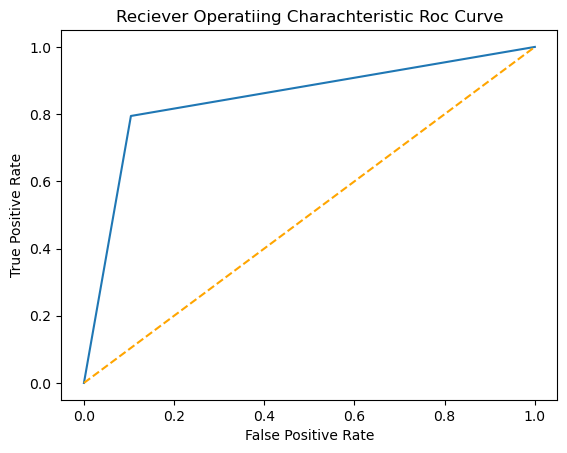

In [143]:
accuracy = roc_auc_score(y_test,y_pred)
plt.plot(fpr , tpr , label = 'acc={:.2f}'.format(accuracy))
plt.plot([0,1],[0,1],color='orange' , linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operatiing Charachteristic Roc Curve')
plt.show()

In [130]:
prediction = pd.DataFrame()
prediction['Original'] = y_test
prediction['Predicted'] = y_pred
prediction

,Original,Predicted
594,0,0
654,0,0
526,1,1
677,1,1
628,0,0
...,...,...
465,0,0
624,0,0
852,0,1
244,0,0


# predict if passengers survived or not

In [131]:
df2.iloc[39]

Survived     0.000000
Pclass       3.000000
Sex          1.000000
Age         29.699118
SibSp        2.000000
Parch        0.000000
Fare         2.788353
Embarked     3.000000
Name: 48, dtype: float64

In [132]:
potential = final_ac.predict(scaler.transform([[3.0,1.0,29.699118,2.0,0.0,2.788353,3.0]]))
if potential == 0:
    print('NOT SURVIVED')
else:
    print('SURVIVED')

NOT SURVIVED


In [137]:
df2.tail(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,1,27.000000,0,0,2.351335,0
887,1,1,0,19.000000,0,0,3.107233,0
888,0,3,0,29.699118,1,2,2.862294,0
889,1,1,1,26.000000,0,0,3.107233,3
890,0,3,1,32.000000,0,0,1.978946,1


In [138]:
#prdict for index 887 who survived
potential = final_ac.predict(scaler.transform([[1 ,0 ,19.000000 ,0 ,0 ,3.107233 ,0]]))
if potential == 0:
    print('NOT SURVIVED')
else:
    print('SURVIVED')

SURVIVED


In [139]:
#prdict for index 889 who survived
potential = final_ac.predict(scaler.transform([[1 ,1 ,26.000000 ,0 ,0 ,3.107233,3]]))
if potential == 0:
    print('NOT SURVIVED')
else:
    print('SURVIVED')

SURVIVED


In [140]:
#prdict for index 889 who did not
potential = final_ac.predict(scaler.transform([[3 ,1,32.000000,0 ,0 ,1.978946,1]]))
if potential == 0:
    print('NOT SURVIVED')
else:
    print('SURVIVED')

NOT SURVIVED
